# Marketing Data Analysis

## Table of Contents:
- [Goal](#goal)
- [Data](#data)
- [Usage Funnels](#usage-funnels)
    - [Quiz Funnel](#quiz-funnel)
        - [Data Investigation](#data-investigation-1)
        - [Survey Database Creation](#survey-database-creation)
        - [Quiz Funnel Creation](#quiz-funnel-creation)
    - [Home Try-On Funnel](#home-try-on-funnel)
        - [Data Investigation](#data-investigation-2)
        - [Adding New Tables to Database](#adding-new-tables-to-database)
        - [A/B Test](#ab-test)
        - [Conversion Funnel](#conversion-funnel)
        - [Most Common Choice](#most-common-choice)
        - [Actionable Insights](#actionable-insights)
- [Calculating Churn](#calculating-churn)
    - [Subscriptions Data Investigation](#subscriptions-data-investigation)
    - [Subscriptions Data Base Creation](#subscriptions-data-base-creation)
    - [Calculate Segments' Churn](#calculate-segments-churn)
- [Marketing Attribution](#marketing-attribution)


Note: table of contents' links are processed incorrectly when uploaded to GitHub, it will be fixed after completing the main tasks of this project. 

## Goal <a class="anchor" id="goal"></a>

The goal of this project is getting customer related insights by:
- Applying *usage funnel* marketing model;
- Conducting A/B test;
- Calculating one of the most important marketing metrics - *churn rate*;
- Ascertaining *first- and last-touch attribution* sources. 

All these techniques will be implemented using SQL queries, some results will be visualized to get a view of the data from a different angle.

## Data <a class="anchor" id="data"></a>

Unfortunately, no universal dataset was found for applying all listed marketing techniques at one go. Therefore, different datasets related to different companies will be used for each technique. All datasets are precleaned and contain aggregated information from companies: [Warby Parker](https://www.warbyparker.com), [Codeflix](https://codeflix.com) and "CoolTShirts". All data is provided by Codecademy.com.

## Usage Funnels <a class="anchor" id="usage-funnels"></a>

A usage funnel is a marketing model which illustrates the theoretical customer journey towards the purchase of a product or service. By applying it we want to apprehend the total number of users in each step of the funnel, as well as the percent of users who complete each step. In this part of the project, we will analyze different marketing funnels of an eyewear brand "Warby Parker" in order to calculate their conversion rates.  

There are 2 funnels we are going to build:
**Quiz Funnel**, which uses dataset `survey.csv` and **Home Try-On Funnel** based on datasets: `quiz.csv`, `home_try_on.csv`, `purchase.csv`.

### Quiz Funnel <a class="anchor" id="quiz-funnel"></a>

To help users find their perfect frame, Warby Parker has a [Style Quiz](https://www.warbyparker.com/quiz) that has the following questions:
- “What are you looking for?”
- “What’s your fit?”
- “Which shapes do you like?”
- “Which colors do you like?”
- “When was your last eye exam?”

The users’ responses are stored in the file `survey.csv`, so let's start with data imports and data investigation.


In [1]:
# Basic imports related to analysis
import pandas as pd
import numpy as np

# Imports related to database management
import sqlite3

# Import for visualisation
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

#### Data Investigation <a class="anchor" id="data-investigation-1"></a>

Considering necessity to display and visualize results fetched from SQL database in the Notebook, we first are going to convert `csv` files to pandas `DataFrames` and after that create databases from these `DataFrames`.

In [2]:
survey = pd.read_csv('funnels_datasets/survey.csv')
survey

,question,user_id,response
0,1. What are you looking for?,005e7f99-d48c-4fce-b605-10506c85aaf7,Women's Styles
1,2. What's your fit?,005e7f99-d48c-4fce-b605-10506c85aaf7,Medium
2,3. Which shapes do you like?,00a556ed-f13e-4c67-8704-27e3573684cd,Round
3,4. Which colors do you like?,00a556ed-f13e-4c67-8704-27e3573684cd,Two-Tone
4,1. What are you looking for?,00a556ed-f13e-4c67-8704-27e3573684cd,I'm not sure. Let's skip it.
...,...,...,...
1981,5. When was your last eye exam?,ff48cdf3-e09e-4fb3-a46b-3751c9764dc7,<1 Year
1982,1. What are you looking for?,ff8461f7-e500-458c-9087-98fa63562d99,Women's Styles
1983,3. Which shapes do you like?,ff8461f7-e500-458c-9087-98fa63562d99,Rectangular
1984,4. Which colors do you like?,ff8461f7-e500-458c-9087-98fa63562d99,Tortoise


Result: Table contains only 3 columns `question`, `user_id` and `response`. Let's check some basic statistics of this set. 

In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1986 non-null   object
 1   user_id   1986 non-null   object
 2   response  1986 non-null   object
dtypes: object(3)
memory usage: 46.7+ KB


Result: As was mentioned before - dataset is precleaned and unlikely to contain any `null`s, so let's proceed to database creation. 

#### Warby Parker Database Creation <a class="anchor" id="survey-database-creation"></a>

In [4]:
# Create new db
connect = sqlite3.connect('./funnels_datasets/warby_parker.db')

# Create new table in db
survey.to_sql('Survey', connect, if_exists='replace', index=False)

# Create db cursor
cursor = connect.cursor()

Now we need to wrap each query in a python function that converts results back to `DataFrame`.

In [26]:
def sql(*args, cursor=cursor, **kwargs):
    cur = cursor.execute(*args, **kwargs)
    return pd.DataFrame(cur.fetchall(), columns=[column_name[0] for column_name in cur.description])

Now we can check how SQL queries' results are converted back to `DataFrame`. 

In [27]:
sql('''
    SELECT *
    FROM Survey
    LIMIT 5;
''')

,question,user_id,response
0,1. What are you looking for?,005e7f99-d48c-4fce-b605-10506c85aaf7,Women's Styles
1,2. What's your fit?,005e7f99-d48c-4fce-b605-10506c85aaf7,Medium
2,3. Which shapes do you like?,00a556ed-f13e-4c67-8704-27e3573684cd,Round
3,4. Which colors do you like?,00a556ed-f13e-4c67-8704-27e3573684cd,Two-Tone
4,1. What are you looking for?,00a556ed-f13e-4c67-8704-27e3573684cd,I'm not sure. Let's skip it.


Everything seems fine, so let's proceed to the funnel building step. 

#### Quiz Funnel Creation <a class="anchor" id="quiz-funnel-creation"></a> 

Users will “give up” at different points in the survey. Let’s analyze how many users move from Question 1 to the next.

In [7]:
quiz_funnel = sql('''
    SELECT question,
    COUNT(DISTINCT user_id) AS users_count,
    COUNT(DISTINCT user_id) * 100.0 / LAG(COUNT(DISTINCT user_id), 1, COUNT(DISTINCT user_id)) OVER (
        ORDER BY 1
    ) AS percentages
    FROM Survey
    GROUP BY 1;
''')
quiz_funnel

,question,users_count,percentages
0,1. What are you looking for?,500,100.000000
1,2. What's your fit?,475,95.000000
2,3. Which shapes do you like?,380,80.000000
3,4. Which colors do you like?,361,95.000000
4,5. When was your last eye exam?,270,74.792244


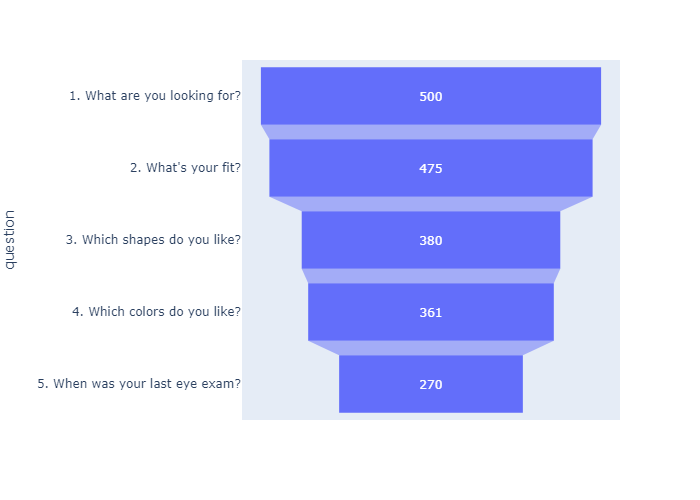

In [8]:
fig = px.funnel(quiz_funnel, x='users_count', y='question')
fig.show('png')

Result: 
- We can clearly see that the number of users answering each question, after the first one, is declining.
- Especially challenging are the 3rd and the 5th questions. The 3rd, because there could be several shapes that looking more or less good on them or the other way around - no such shapes that a person aware of. The 5th, because not many people remember when they have last been at doctor's checking eyesight. 
- 2nd question is related to constant physical parameters of a person, judging from the percentage of those who answered, they seem to be easily measurable for an ordinary user.
- color is a safe option after shape, because at this point one could easily select something neutral as black or silver just to be done with it.

### Home Try-On Funnel <a class="anchor" id="home-try-on-funnel"></a>

Warby Parker’s purchase funnel is:
**Take the Style Quiz → Home Try-On → Purchase the Perfect Pair of Glasses**

During the Home Try-On stage, results of an A/B Test will be calculated. 
Groups fot testing:

- 50% of the users will get 3 pairs to try on
- 50% of the users will get 5 pairs to try on

Let’s find out whether or not users who get more pairs to try on at home will be more likely to make a purchase.


The data is distributed across three tables:
- quiz
- home_try_on
- purchase

Let's start by examining the first  and last five rows of each table - we convert them to `DataFrames` first, as previously.

#### Data Investigation <a class="anchor" id="data-investigation-2"></a>

In [9]:
quiz = pd.read_csv('funnels_datasets/quiz.csv')
quiz

,user_id,style,fit,shape,color
0,4e8118dc-bb3d-49bf-85fc-cca8d83232ac,Women's Styles,Medium,Rectangular,Tortoise
1,291f1cca-e507-48be-b063-002b14906468,Women's Styles,Narrow,Round,Black
2,75122300-0736-4087-b6d8-c0c5373a1a04,Women's Styles,Wide,Rectangular,Two-Tone
3,75bc6ebd-40cd-4e1d-a301-27ddd93b12e2,Women's Styles,Narrow,Square,Two-Tone
4,ce965c4d-7a2b-4db6-9847-601747fa7812,Women's Styles,Wide,Rectangular,Black
...,...,...,...,...,...
995,b04d4c11-00bd-48a7-b886-957488d2e78d,Men's Styles,Narrow,Square,Neutral
996,468da0a9-4e0a-475c-afd3-5cbcade1f0d1,I'm not sure. Let's skip it.,Narrow,Rectangular,Crystal
997,1de6c3a5-f1b0-4622-a871-389aeeb5b8de,Men's Styles,Narrow,Round,Two-Tone
998,59f00e26-0b5c-4c9b-97ae-e1129a45b262,Women's Styles,I'm not sure. Let's skip it.,Square,Tortoise


In [10]:
home_try_on = pd.read_csv('funnels_datasets/home_try_on.csv')
home_try_on

,user_id,number_of_pairs,address
0,d8addd87-3217-4429-9a01-d56d68111da7,5 pairs,145 New York 9a
1,f52b07c8-abe4-4f4a-9d39-ba9fc9a184cc,5 pairs,383 Madison Ave
2,8ba0d2d5-1a31-403e-9fa5-79540f8477f9,5 pairs,287 Pell St
3,4e71850e-8bbf-4e6b-accc-49a7bb46c586,3 pairs,347 Madison Square N
4,3bc8f97f-2336-4dab-bd86-e391609dab97,5 pairs,182 Cornelia St
...,...,...,...
745,99f1fad4-5142-45fd-a122-6185eadabf38,3 pairs,447 Ctrl Park Powell Blvd Appr
746,b5b3a93c-e143-478c-9284-cf51d09c4fa9,5 pairs,464 Greenwich Ave
747,12b0b516-2fb0-4da6-bb4d-a09f438ae96e,3 pairs,487 Perry St
748,2e3e3236-89fd-4e09-a4c9-babf7675819f,5 pairs,31 Wyckoff Ave


In [11]:
purchase = pd.read_csv('funnels_datasets/purchase.csv')
purchase

,user_id,product_id,style,model_name,color,price
0,00a9dd17-36c8-430c-9d76-df49d4197dcf,8,Women's Styles,Lucy,Jet Black,150
1,00e15fe0-c86f-4818-9c63-3422211baa97,7,Women's Styles,Lucy,Elderflower Crystal,150
2,017506f7-aba1-4b9d-8b7b-f4426e71b8ca,4,Men's Styles,Dawes,Jet Black,150
3,0176bfb3-9c51-4b1c-b593-87edab3c54cb,10,Women's Styles,Eugene Narrow,Rosewood Tortoise,95
4,01fdf106-f73c-4d3f-a036-2f3e2ab1ce06,8,Women's Styles,Lucy,Jet Black,150
...,...,...,...,...,...,...
490,fdb36b83-f7e5-475a-9165-336fc3a39ccc,6,Women's Styles,Olive,Pearled Tortoise,95
491,fdd0cc7d-b9fc-404e-9d95-f69b230d2e72,10,Women's Styles,Eugene Narrow,Rosewood Tortoise,95
492,fdf35090-5080-4d90-9204-7af788268837,10,Women's Styles,Eugene Narrow,Rosewood Tortoise,95
493,fee44777-bbd7-44ea-8102-291c89d0519b,1,Men's Styles,Brady,Layered Tortoise Matte,95


`quiz` table has the following columns:
- `user_id`;
- `style`;
- `fit`;
- `shape`;
- `color`.

`home_try_on` table has the following columns:
- `user_id`;
- `number_of_pairs`;
- `address`.

`purchase` table has the following columns:
- `user_id`;
- `product_id`;
- `style`;
- `model_name`;
- `color`;
- `price`.

Let's create databases from these tables. In most cases such information is stored in different tables within one relational database, so we are going to do the same. We can always join some tables later, to get any required info via query. 

#### Adding New Tables to Database <a class="anchor" id="adding-new-tables-to-database"></a>

In [12]:
# Create new tables in db
purchase.to_sql('Purchase', connect, if_exists='replace', index=False)
quiz.to_sql('Quiz', connect, if_exists='replace', index=False)
home_try_on.to_sql('Home_try_on', connect, if_exists='replace', index=False)

750

#### A/B Test <a class="anchor" id="ab-test"></a>

Now we need to select only particular, required for A/B test, information from these tables. We are going to save the resulting table as addition to our database to continue using concise SQL queries. 

In [13]:
# Join tables and aggregate required info
ab_test = sql('''
    SELECT DISTINCT q.user_id,
    number_of_pairs,
    h.user_id IS NOT NULL AS home_try_on,
    p.user_id IS NOT NULL AS purchase
    FROM quiz AS q
    LEFT JOIN home_try_on AS h
        ON q.user_id = h.user_id
    LEFT JOIN purchase AS p
        ON q.user_id = p.user_id;
''')
# Save result of query to db
ab_test.to_sql('AB_test', connect, if_exists='replace', index=False)
# Display table 
sql('''
    SELECT *
    FROM ab_test
    LIMIT 5
''')

,user_id,number_of_pairs,home_try_on,purchase
0,4e8118dc-bb3d-49bf-85fc-cca8d83232ac,3 pairs,1,0
1,291f1cca-e507-48be-b063-002b14906468,3 pairs,1,1
2,75122300-0736-4087-b6d8-c0c5373a1a04,None,0,0
3,75bc6ebd-40cd-4e1d-a301-27ddd93b12e2,5 pairs,1,0
4,ce965c4d-7a2b-4db6-9847-601747fa7812,3 pairs,1,1


Now we can calculate the difference in purchase rates between customers who had 3 `number_of_pairs` with ones who had 5.

In [14]:
sql('''
    SELECT number_of_pairs,
        SUM(home_try_on) AS tried,
        SUM(purchase) AS purchased,
        SUM(purchase)* 100.0/SUM(home_try_on)  AS percent    
    FROM AB_test
    GROUP BY number_of_pairs
''')

,number_of_pairs,tried,purchased,percent
0,None,0,0,NaN
1,3 pairs,379,201,53.034301
2,5 pairs,371,294,79.245283


A/B Test Result: Those who got 5 pairs to try at home were `26%` more likely to purchase glasses than those who got 3. 

#### Conversion Funnel <a class="anchor" id="conversion-funnel"></a>


Let's calculate the funnel of overall conversion rates by aggregating across all rows.

In [15]:
conv_funnel = sql('''
    SELECT count(user_id) as quiz,
        SUM(home_try_on) AS tried,
        SUM(purchase) AS purchased
    FROM AB_test
''')
conv_funnel

,quiz,tried,purchased
0,1000,750,495


We can visualize that, but first reshape it, so each row would contain one observation. 

In [16]:
conv_funnel_melted = conv_funnel.melt(
     # Column to use as identifier variables
    id_vars=None,
    # Column name to use for “variable” names/column headers
    var_name='Action Performed',
    # Column name for the values originally in the columns 
    value_name='Value'
)
conv_funnel_melted

,Action Performed,Value
0,quiz,1000
1,tried,750
2,purchased,495


That's better, now visualization.

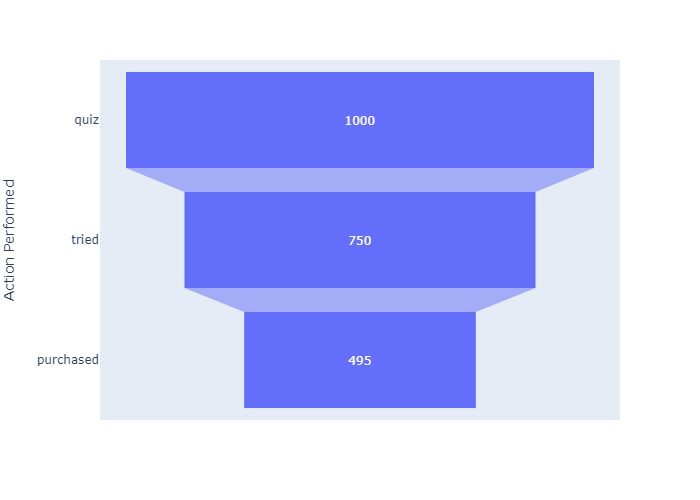

In [17]:
fig = px.funnel(conv_funnel_melted, x='Value', y='Action Performed')
fig.show('png')

Now le't compare conversion from **quiz→home_try_on** and **home_try_on→purchase** in percentages.

In [18]:
sql('''
    SELECT SUM(home_try_on) * 100.0 / count(user_id) AS tried_percent,
        SUM(purchase) * 100.0 / SUM(home_try_on) AS purchased_percent
    FROM AB_test
''')

,tried_percent,purchased_percent
0,75.0,66.0


Results: 
- From those who took quiz - 75% got glassed to try at home.
- From those who tried glasses at home - 66% bought the glasses.

#### Most Common Choice <a class="anchor" id="most-common-choice"></a>

Let's find the most common results of the style quiz.

In [19]:
sql('''
    SELECT style, fit, shape, color,
        COUNT(user_id) AS user_count
    FROM Quiz
    GROUP BY style, fit, shape, color
    ORDER BY user_count DESC
    LIMIT 10
''')

,style,fit,shape,color,user_count
0,Men's Styles,Narrow,Rectangular,Tortoise,23
1,Women's Styles,Narrow,Rectangular,Black,20
2,Women's Styles,Narrow,Rectangular,Tortoise,20
3,Men's Styles,Medium,Rectangular,Tortoise,19
4,Men's Styles,Narrow,Rectangular,Black,18
5,Men's Styles,Medium,Rectangular,Black,17
6,Men's Styles,Narrow,Square,Tortoise,16
7,Women's Styles,Medium,Rectangular,Tortoise,16
8,Women's Styles,Medium,Square,Tortoise,16
9,Women's Styles,Narrow,Square,Crystal,16


Result: Men's narrow glasses of rectangular form and tortoise color seem to be a special chic - 23 pairs were sold already. 

What about the most common types of purchase made?

In [20]:
sql('''
    SELECT product_id, style, model_name, color, price,
        COUNT(user_id) AS user_count
    FROM Purchase
    GROUP BY product_id, style, model_name, color, price
    ORDER BY user_count DESC
    LIMIT 10
''')

,product_id,style,model_name,color,price,user_count
0,3,Men's Styles,Dawes,Driftwood Fade,150,63
1,10,Women's Styles,Eugene Narrow,Rosewood Tortoise,95,62
2,9,Women's Styles,Eugene Narrow,Rose Crystal,95,54
3,1,Men's Styles,Brady,Layered Tortoise Matte,95,52
4,6,Women's Styles,Olive,Pearled Tortoise,95,50
5,4,Men's Styles,Dawes,Jet Black,150,44
6,7,Women's Styles,Lucy,Elderflower Crystal,150,44
7,2,Men's Styles,Brady,Sea Glass Gray,95,43
8,8,Women's Styles,Lucy,Jet Black,150,42
9,5,Men's Styles,Monocle,Endangered Tortoise,50,41


Result: Men's Dawes with the color Driftwood Fade and the cost 150 American dollars (presumably) - are the leader of sales, with 63 pairs sold. 


#### Actionable Insights <a class="anchor" id="actionable-insights"></a>

A/B Test results say that people are `26%` likely to buy glasses if they try 5 pairs at home, than if they try 3. 

## Calculating Churn <a class="anchor" id="calculating-churn"></a>

A common revenue model for SaaS (Software as a service) companies is to charge a monthly subscription fee for access to their product. Frequently, these companies aim to continually increase the number of users paying for their product. One metric that is helpful for this goal is churn rate.

**Churn rate** is the percent of subscribers that have canceled within a certain period, usually a month. For a user base to grow, the churn rate must be less than the new subscriber rate for the same period.

"Codeflix", a streaming video startup, is interested in measuring their user churn rate. The company requires a minimum subscription length of 31 days, so a user can never start and end their subscription in the same month. To calculate the churn rate, we only will be considering users who are subscribed at the beginning of the month. So the churn rate is the number of these users who cancel during the month divided by the total number of subscribers.

There could be several questions about company's churn rate we could ask: 

- How many months has the company been operating? 
- Which months do we have enough information to calculate a churn rate?
- What segments of users exist?
- What is the difference of churn rates between user segments?
- Which segment of users should the company focus on expanding?

Let's upload the dataset `churn_dataset_subscriptions.csv` into pandas `DataFrame` to investigate it. 

### Subscriptions Data Investigation <a class="anchor" id="subscriptions-data-investigation"></a>

In [21]:
subs = pd.read_csv('churn_dataset_subscriptions.csv')
subs

,id,subscription_start,subscription_end,segment
0,1,2016-12-01,2017-02-01,87
1,2,2016-12-01,2017-01-24,87
2,3,2016-12-01,2017-03-07,87
3,4,2016-12-01,2017-02-12,87
4,5,2016-12-01,2017-03-09,87
...,...,...,...,...
1995,1996,2017-03-30,NaN,30
1996,1997,2017-03-30,NaN,30
1997,1998,2017-03-30,NaN,30
1998,1999,2017-03-30,NaN,30


The provided dataset contains 2000 rows and 4 columns:
- `id`: the subscription id;
- `subscription_start`: the start date of the subscription;
- `subscription_end`: the end date of the subscription;
- `segment`: this identifies which segment the subscription owner belongs to.

Let's create a database out of this table to have something to apply SQL queries to. 

### Subscriptions Data Base Creation <a class="anchor" id="subscriptions-data-base-creation"></a>

In [25]:
# Create new db
connect2 = sqlite3.connect('./codeflix.db')

# Create new table in db
subs.to_sql('Subs', connect2, if_exists='replace', index=False)

# Create db cursor
cursor2 = connect2.cursor()

Database is created, let's see how it looks.

In [32]:
sql('''
    SELECT *
    FROM Subs
    LIMIT 5;
''', cursor=cursor2)

,id,subscription_start,subscription_end,segment
0,1,2016-12-01,2017-02-01,87
1,2,2016-12-01,2017-01-24,87
2,3,2016-12-01,2017-03-07,87
3,4,2016-12-01,2017-02-12,87
4,5,2016-12-01,2017-03-09,87


How many distinct segments there are? 

In [31]:
sql('''
    SELECT DISTINCT segment
    FROM Subs;
''', cursor=cursor2)

,segment
0,87
1,30


Result: there are only 2 distinct segments: 30 and 87.

Let's determine the range of months of data provided, to understand which months will we be able to calculate churn for.

In [35]:
sql('''
    SELECT MIN(subscription_start),
    MAX(subscription_start),
    MIN(subscription_end),
    MAX(subscription_end)
    FROM Subs
''', cursor=cursor2)

,MIN(subscription_start),MAX(subscription_start),MIN(subscription_end),MAX(subscription_end)
0,2016-12-01,2017-03-30,2017-01-01,2017-03-31


Result: there are 4 available months, but we are going to calculate the churn rate for both segments (87 and 30) over the first 3 months of 2017. We can’t calculate it for December, since there are no `subscription_end` values - min subscription end is 01.01.2017.

### Calculate Segments' Churn <a class="anchor" id="calculate-segments-churn"></a>


In [56]:
churn = sql('''
    WITH months AS (
        SELECT 
            '2017-01-01' AS first_day,
            '2017-01-31' AS last_day
        UNION

        SELECT
            '2017-02-01' AS first_day,
            '2017-02-28' AS last_day
        UNION 
        
        SELECT
            '2017-03-01' AS first_day,
            '2017-03-31' AS last_day
    ),


    cross_join AS (
        SELECT *
        FROM Subs
        CROSS JOIN months
    ),

    status AS (
        SELECT
            id,
            segment,
            first_day AS month,
            CASE
                WHEN (subscription_start < first_day)
                    AND (
                        subscription_end > first_day
                        OR subscription_end IS NULL
                    )
                    THEN 1
                ELSE 0
            END AS is_active,

            CASE 
                WHEN (subscription_end BETWEEN first_day AND last_day)
                    THEN 1
                ELSE 0
            END AS is_canceled
        FROM cross_join
    ),


    status_aggregate AS (
        SELECT 
            month,
            segment,
            SUM(is_active) as active,
            SUM(is_canceled) as canceled
        FROM status
        GROUP BY month, segment
    )
    
    SELECT
        month,
        segment,
        100.0 * canceled / active AS churn_rate
    FROM status_aggregate
    GROUP BY month, segment;
''', cursor=cursor2)
churn

,month,segment,churn_rate
0,2017-01-01,30,7.560137
1,2017-01-01,87,25.179856
2,2017-02-01,30,7.335907
3,2017-02-01,87,32.034632
4,2017-03-01,30,11.731844
5,2017-03-01,87,48.587571


Now let's visualise our churn results.

Text(0.5, 1.0, 'Churn Rate by Segment')

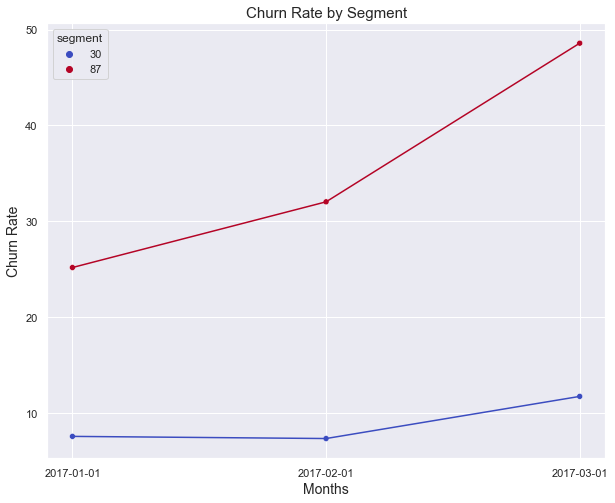

In [68]:
# Prepare figure
sns.set(style='darkgrid')
plt.figure(figsize = (10,8))

# Draw plots
sns.lineplot(data=churn, x='month', y='churn_rate', hue='segment', palette='coolwarm', legend=False)
sns.scatterplot(data=churn, x='month', y='churn_rate', hue='segment', palette='coolwarm',legend=True)

# Add descriptions
plt.xlabel('Months', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.title('Churn Rate by Segment', fontsize=15)


Result: Churn rate of segment 87 is significantly higher and rising more drastically during selected 3 months, than the one of segment 30. So the company should focus on expanding the segment of users with the number 30.

## Marketing Attribution <a class="anchor" id="marketing-attribution"></a>

Recently, "CoolTShirts" started a few marketing campaigns to increase website visits and purchases. Using touch attribution, they’d like to map their customers’ journey: from initial visit to purchase. They can use that information to optimize their marketing campaigns.

In this project, we’ll be helping them answer several questions about their campaigns:

- How many campaigns and sources does "CoolTShirts" use and how are they related? 
- What pages are on their website?
- What is the user journey?
- How many first touches is each campaign responsible for?
- How many last touches is each campaign responsible for?
- How many visitors make a purchase?
- How many last touches on the purchase page is each campaign responsible for?
- What is the typical user journey?
- "CoolTShirts" can re-invest in 5 campaigns. Which should they pick and why?

TBC